<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_11_Project_2_Option_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Dataset Analysis

In this project we will retreive the heart disease dataset from UCI database, process it and use DL model to classify patients into those who get and dont get heart disease. The outcome will be binarized

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

## Numerical Analysis
import numpy as np
import scipy.stats as stats

## Dataset Management
import pandas as pd
import scipy.stats as stats

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## High-Quality Figures
from IPython import display
display.set_matplotlib_formats("svg")

In [2]:
# Download the data from original database
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data = pd.read_csv(url, sep = ",", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Rename the column according to the infor provided by the database
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
data.shape

(303, 14)

In [5]:
data = data.replace("?", np.nan).dropna()
data.shape

(297, 14)

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

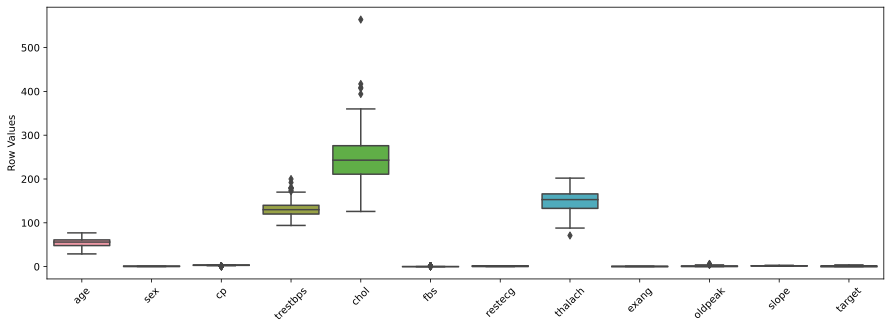

In [7]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Row Values")
plt.show()

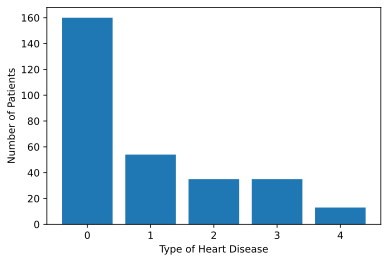

In [8]:
# Check target value distribution
counts = data["target"].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel("Type of Heart Disease")
plt.ylabel("Number of Patients")
plt.show()

In [9]:
# Binarize the target values
data["disease"] = 0
data["disease"][data["target"] > 0] = 1
data.head()

<ipython-input-9-bffb377e8a7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["disease"][data["target"] > 0] = 1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


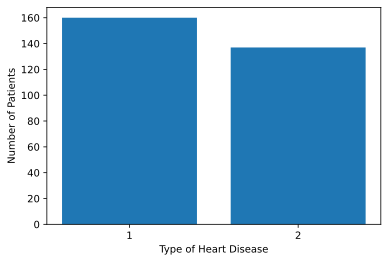

In [10]:
# More Balanced
counts = data["disease"].value_counts()
plt.bar(list(counts.keys()), counts, tick_label=[1,2])
plt.xlabel("Type of Heart Disease")
plt.ylabel("Number of Patients")
plt.show()

In [11]:
# Normalize the data
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop(["target", "disease"])
cols2zscore

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [12]:
# Force to be numeric and normalize
for col in cols2zscore:
    new_col = pd.to_numeric(data[col])
    data[col] = new_col

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [13]:
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,disease
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,0,0
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,2,1
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,1,1
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,0,0
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,0,0


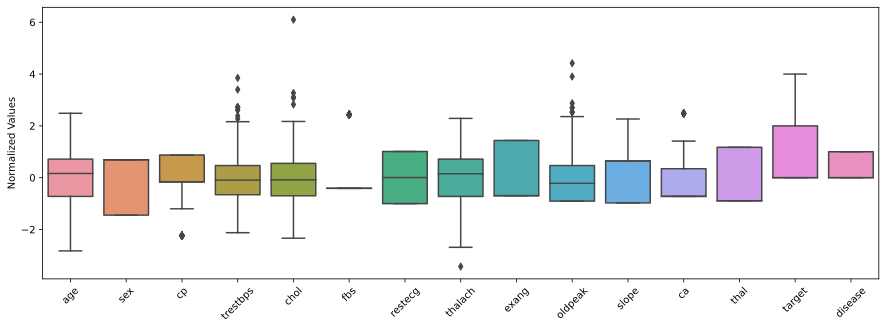

In [14]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Normalized Values")
plt.show()

In [15]:
# Convert the data into tensors
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data["disease"].values).float()

print(dataT.shape)
print(labels.shape)

# We need the labels to be tensor
labels = labels[:,None]
print(labels.shape)

torch.Size([297, 13])
torch.Size([297])
torch.Size([297, 1])


In [16]:
labels.T

tensor([[0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
         1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
         1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
         1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
         0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
         0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 1.,

In [50]:
# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size = 0.1)

# Convert to Pytorch datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Translate to dataloader objects
batchsize = 8
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [51]:
# We will use the data processed above. Define the model Class
class Heart(nn.Module):
    def __init__(self):
        super().__init__()

        # Input layer
        self.input = nn.Linear(13,32)

        # Define two hidden layers
        self.fc1 = nn.Linear(32,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,32)

        # Define the output layer
        self.output = nn.Linear(32,1)

    # Forwad Pass
    def forward(self,x):
        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return self.output(x)

In [52]:
# Time to train
numepochs = 200

def trainTheModel():

    # Loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)

    # Initialize the losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # switch on he training mode
        net.train()

        # Loop over the training data batches
        batchAcc = []
        batchLoss = []

        for X,y in train_loader:

            # Forward pass and loss
            yHat = net(X)
            loss = lossfun(yHat,y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from single batch
            batchLoss.append(loss.item())

            # Training Accuracy for single batch
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
        # End of the batch loop

        # Average training accuracy for batches in this epoch
        trainAcc.append(np.mean(batchAcc))

        # Average losses accross the baches
        losses[epochi] = np.mean(batchLoss)

        # test the accuracy
        net.eval()

        # Extract X and y from dataloader
        X,y = next(iter(test_loader))
        # deactivate autograd
        with torch.no_grad():
            yHat = net(X)

        testAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
        
    # Final output
    return trainAcc, testAcc, losses

In [53]:
# Create and Train a model
net = Heart()
trainAcc, testAcc, losses = trainTheModel()

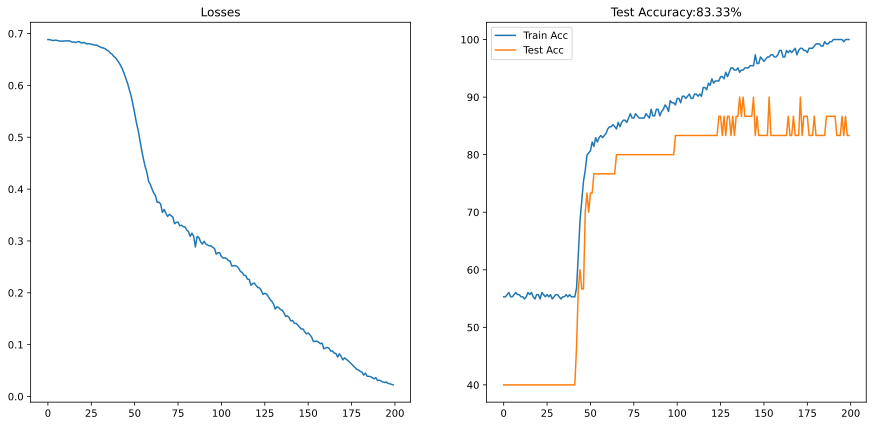

In [54]:
fig,ax = plt.subplots(1,2,figsize=(15,7))

ax[0].plot(losses)
ax[0].set_title("Losses")

ax[1].plot(trainAcc, label = "Train Acc")
ax[1].plot(testAcc, label = "Test Acc")
ax[1].set_title(f"Test Accuracy:{testAcc[-1]:.2f}%")
ax[1].legend()

plt.show()

In [55]:
# Run the model multiple times
num_times = 10
overall_acc = np.zeros((num_times, 2))

for i in range(num_times):
    net = Heart()
    trainAcc, testAcc, losses = trainTheModel()
    overall_acc[i,0] = np.mean(trainAcc[-10:])
    overall_acc[i,1] = np.mean(testAcc[-10:])

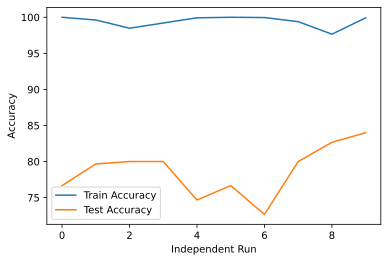

In [56]:
plt.plot(overall_acc)
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.xlabel("Independent Run")
plt.ylabel("Accuracy")
plt.show()